# Zadanie

W celu oszacowania dokładności pomiarów wykonanych pewnym przyrządem dokonano $8$ pomiarów pewnej wielkości i otrzymano: 

$18.17, 18.21, 18.05, 18.14, 18.19, 18.22, 18.06, 18.08$. 

Zweryfikować na poziomie istotności $\alpha = 0.05$ hipotezę $\sigma^2=0.06$ wobec hipotez alternatywnych:

<ul>
<li> $\sigma^2 \neq 0.06$ </li>
<li> $\sigma^2 < 0.06$ </li>
<li> $\sigma^2 > 0.06$ </li>
</ul>


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy import integrate

## Model 1.

Badana cecha $X$ populacji generalnej ma rozkład $N(\mu,\sigma)$ przy <b>obu parametrach nieznanych</b> ($n<50$). 

Weryfikujemy hipotezę:

$$
H_{0}: \sigma^2 = \sigma^2_0
$$
vs
$$
H_{1}: \sigma = \sigma_1 > \sigma_0
$$

W tym teście używa się statystyki

$$
\chi^2=\frac{n S^2}{\sigma_0^2} 
$$

Zbiór krytyczny jest dany za pomocą przedziału

$$
[\chi^2(1-\alpha,n-1), +\infty)
$$

gdzie $\chi^2(\alpha,n)$ jest kwantylem rozkładu $\chi^2$ przy $n$ stopniach swobody oraz

$
S^2 = \frac{1}{n} \sum_{i=1}^{n} (X_{i} - \bar X)^2.
$



## Model 2.

Badana cecha $X$ populacji generalnej ma rozkład $N(\mu,\sigma)$ przy <b>obu parametrach nieznanych</b> ($n<50$).

Weryfikujemy hipotezę:

$$
H_{0}: \sigma = \sigma_0
$$

vs

$$
H_{1}: \sigma = \sigma_1 < \sigma_0
$$

W tym teście używa się statystyki

$$
\chi^2=\frac{n S^2}{\sigma_0^2} 
$$

Zbiór krytyczny jest dany za pomocą przedziału

$$
(0, \chi^2(\alpha,n-1)]
$$

gdzie $\chi^2(\alpha,n)$ jest kwantylem rozkładu $\chi^2$ przy $n$ stopniach swobody oraz

$
S^2 = \frac{1}{n} \sum_{i=1}^{n} (X_{i} - \bar X)^2.
$


## Model 3

Badana cecha $X$ populacji generalnej ma rozkład $N(\mu,\sigma)$ przy <b>obu parametrach nieznanych</b> ($n<50$).

Weryfikujemy hipotezę:

$$
H_{0}: \sigma = \sigma_0
$$

vs

$$
H_{1}: \sigma = \sigma_1 \neq \sigma_0
$$


W tym teście używa się statystyki

$$
\chi^2=\frac{n S^2}{\sigma_0^2} 
$$

Zbiór krytyczny jest dany za pomocą przedziału

$$
(0, \chi^2(\frac{1}{2}\alpha,n-1)] \cup [\chi^2(1-\frac{1}{2}\alpha,n-1), +\infty)
$$

gdzie $\chi^2(\alpha,n)$ jest kwantylem rozkładu $\chi^2$ przy $n$ stopniach swobody oraz

$
S^2 = \frac{1}{n} \sum_{i=1}^{n} (X_{i} - \bar X)^2.
$


In [3]:
data=np.array([18.17, 18.21, 18.05, 18.14, 18.19, 18.22, 18.06, 18.08])
n=data.size

## Zdefiniujmy zmienną losową o rozkładzie chi-kwadrat

In [4]:
X=stats.chi2(n-1)

## Wyliczmy wartość statystyki

$$
\chi^2=\frac{n S^2}{\sigma_0^2} 
$$

In [5]:
alpha=0.05
bar_x = np.mean(data)
s = np.std(data,ddof=0)
sigma_2=0.06
chi= (n*s**2)/sigma_2
print(bar_x)
print(sigma_2)
print(s)
print(s*s)
print(chi)

18.14
0.06
0.06403124237432893
0.004100000000000057
0.5466666666666743


# $H_0$: $\sigma^2=0.06$ przy hipotezie alternatywnej $H_1$: $\sigma^2\neq0.06$

## Wypisz przedział krytyczny


In [6]:
L1=0
L2=X.ppf(alpha/2)
R1=X.ppf(1-alpha/2)
R2=np.inf

In [7]:
print(r'( %3.3f , %3.3f) sum ( %3.3f , %3.3f)' % (L1,L2,R1,R2))

( 0.000 , 1.690) sum ( 16.013 , inf)


## zweryfikuj hipotezę na podstawie wartości statystyki oraz przedziału krytycznego

In [8]:
if (chi <L2) | (chi > R1):
    print("Wartość statystyki należy do przedziału krytycznego więc odrzucamy hipotezę H_0")
else:
    print("Wartość statystyki nie należy do przedziału krytycznego więc nie ma podstaw by odrzucić hipotezę H_0")

Wartość statystyki należy do przedziału krytycznego więc odrzucamy hipotezę H_0


## wylicz p-value

In [14]:
p = 1-X.cdf(chi)#+X.cdf(chi)
print(p)

0.9992570324401037


## zweryfikuj hipotezę na podstawie wartości p-value

In [15]:
if(p < alpha):
    print("Odrzucam hipotezę zerową H_0")
else:        
    print("Nie ma podstaw by odrzucić hipotezę zerową H_0")

Odrzucam hipotezę zerową H_0


Narysuj gęstość rozkładu statystyki i zaznacz na nim:
<ul>
<li> przedział krytyczny </li>
<li> wartość statystyki testowej </li>
<li> p-value </li>
</ul>

16.0127642746


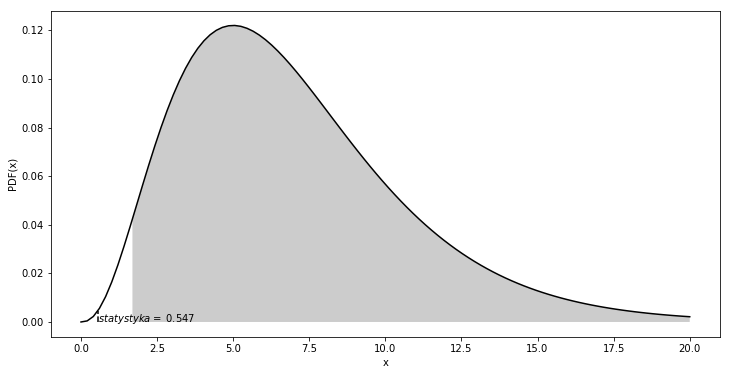

In [24]:
u_1=X.isf(alpha/2)
u_2=X.ppf(alpha/2)
print(u_1)
x = np.linspace(0,20,100)
yp = X.pdf(x)
y = X.cdf(x)
x1 = np.linspace(u_1,20)
y1 = X.pdf(x1)

x2 = np.linspace(u_2,20)
y2 = X.pdf(x2)


figs, axs = plt.subplots(1,1, figsize=(12, 6))
axs.plot(x,yp, 'k')
#axs.fill_between(x1, y1, facecolor='#CCCCCC')
axs.fill_between(x2, y2, facecolor='#CCCCCC')
#axs.text(u_1, 0.1, np.round(X.cdf(u_1),4))
axs.vlines(chi, 0, X.pdf(chi), linestyles='--')
#axs.vlines(X.ppf(X.sf(chi)), 0, X.pdf(X.ppf(X.sf(chi))), linestyles='--')
axs.text(chi, 0, r'$statystyka = $ %.3f' % np.round(chi,3))
axs.set_xlabel('x')
axs.set_ylabel('PDF(x)')
plt.show()

# $H_0$: $\sigma^2=0.06$ przy hipotezie alternatywnej $H_1$: $\sigma^2>0.06$
## Wypisz przedział krytyczny

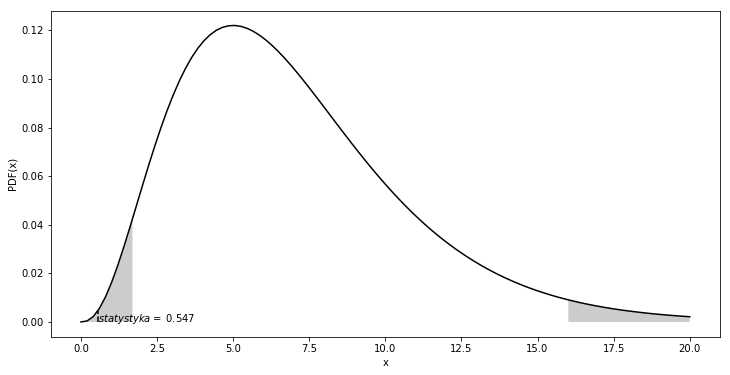

In [11]:
u_1=X.isf(alpha/2)
u_2=X.ppf(alpha/2)

x = np.linspace(0,20,100)
yp = X.pdf(x)
y = X.cdf(x)
x1 = np.linspace(u_1,20)
y1 = X.pdf(x1)

x2 = np.linspace(0,u_2)
y2 = X.pdf(x2)


figs, axs = plt.subplots(1,1, figsize=(12, 6))
axs.plot(x,yp, 'k')
axs.fill_between(x1, y1, facecolor='#CCCCCC')
axs.fill_between(x2, y2, facecolor='#CCCCCC')
#axs.text(u_1, 0.1, np.round(X.cdf(u_1),4))
axs.vlines(chi, 0, X.pdf(chi), linestyles='--')
#axs.vlines(X.ppf(X.sf(chi)), 0, X.pdf(X.ppf(X.sf(chi))), linestyles='--')
axs.text(chi, 0, r'$statystyka = $ %.3f' % np.round(chi,3))
axs.set_xlabel('x')
axs.set_ylabel('PDF(x)')
plt.show()

## zweryfikuj hipotezę na podstawie wartości statystyki oraz przedziału krytycznego

## wylicz p-value

## zweryfikuj hipotezę na podstawie wartości p-value

Narysuj gęstość rozkładu statystyki i zaznacz na nim:
<ul>
<li> przedział krytyczny </li>
<li> wartość statystyki testowej </li>
<li> p-value </li>
</ul>

# $H_0$: $\sigma^2=0.06$ przy hipotezie alternatywnej $H_1$: $\sigma^2<0.06$

## Wypisz przedział krytyczny

## zweryfikuj hipotezę na podstawie wartości statystyki oraz przedziału krytycznego

## wylicz p-value

## zweryfikuj hipotezę na podstawie wartości p-value

Narysuj gęstość rozkładu statystyki i zaznacz na nim:
<ul>
<li> przedział krytyczny </li>
<li> wartość statystyki testowej </li>
<li> p-value </li>
</ul>